In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import keras
from tensorflow.keras.models import Sequential, Model

In [4]:
train_path="Data/seg_train/seg_train/"
test_path="Data/seg_test/seg_test/"
pred_path="Data/seg_pred/"

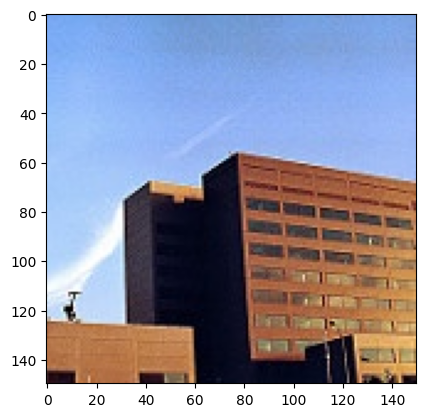

In [5]:
import cv2
import matplotlib.pyplot as plt

pic1 = plt.imread(r'Data\seg_train\seg_train\buildings\47.jpg')
plt.imshow(pic1)

In [6]:
IMAGE_SIZE=(224,224)
BATCH_SIZE=32

ImageDataGenerator class provides utilities to read images from a directory, preprocess them, and create batches of augmented data for training deep learning models.
The rescale parameter is used to rescale the pixel values of images to the range [0,1] by dividing each pixel value by 255.

In [7]:
# from keras.preprocessing.image import ImageDataGenerator

# train_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

# train_data = train_generator.flow_from_directory(train_path,
#                                                  target_size=(224, 224),
#                                                  color_mode="rgb",
#                                                  class_mode="categorical",
#                                                  batch_size=BATCH_SIZE,
#                                                  shuffle=True,
#                                                  subset='training'
#                                                 )

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 14034 files belonging to 6 classes.


In [9]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 3000 files belonging to 6 classes.


In [12]:
class_names = train_ds.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

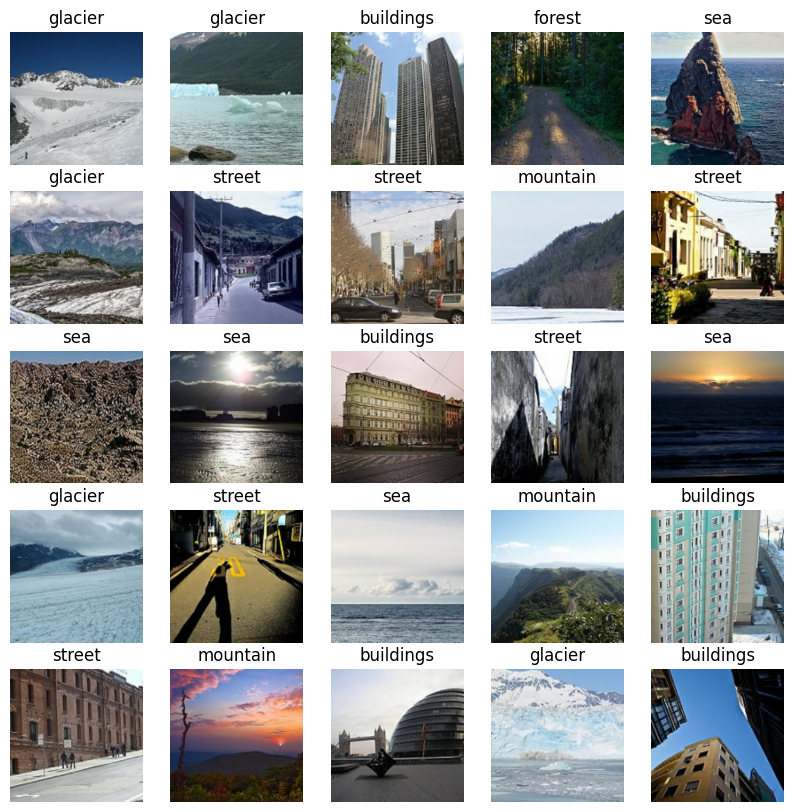

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [25]:
print('Total Training images are:')
print('Buildings: {}'.format(len(os.listdir(r'Data\seg_train\seg_train\buildings'))))
print('forest: {}'.format(len(os.listdir(r'Data\seg_train\seg_train\forest'))))
print('glacier: {}'.format(len(os.listdir(r'Data\seg_train\seg_train\glacier'))))
print('mountain: {}'.format(len(os.listdir(r'Data\seg_train\seg_train\mountain'))))
print('sea: {}'.format(len(os.listdir(r'Data\seg_train\seg_train\sea'))))
print('street: {}'.format(len(os.listdir(r'Data\seg_train\seg_train\street'))))

Total Training images are:
Buildings: 2191
forest: 2271
glacier: 2404
mountain: 2512
sea: 2274
street: 2382


In [27]:
num_images = 0
for images, labels in train_ds:
    num_images += images.shape[0]

print("Number of images:", num_images)

Number of images: 14034


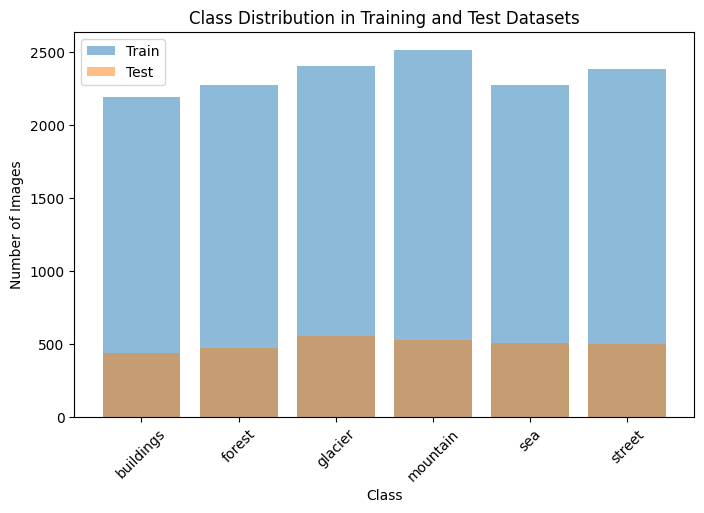

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to get class distribution from a dataset
def get_class_distribution(dataset):
    class_counts = np.zeros(len(dataset.class_names))
    for _, labels in dataset:
        class_counts += np.bincount(labels.numpy(), minlength=len(dataset.class_names))
    return class_counts

# Get class distribution for training and test datasets
train_class_distribution = get_class_distribution(train_ds)
test_class_distribution = get_class_distribution(test_ds)

# Plot the class distribution
plt.figure(figsize=(8, 5))
plt.bar(train_ds.class_names, train_class_distribution, alpha=0.5, label='Train')
plt.bar(test_ds.class_names, test_class_distribution, alpha=0.5, label='Test')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training and Test Datasets')
plt.legend()
plt.xticks(rotation=45)
plt.show()


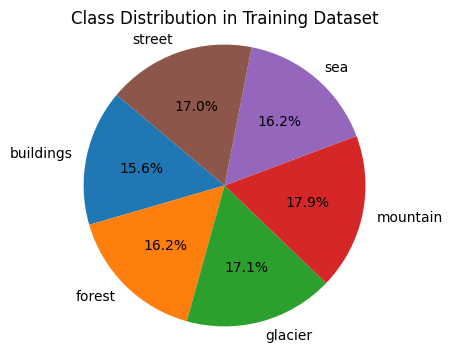

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to get class distribution from a dataset
def get_class_distribution(dataset):
    class_counts = np.zeros(len(dataset.class_names))
    for _, labels in dataset:
        class_counts += np.bincount(labels.numpy(), minlength=len(dataset.class_names))
    return class_counts

# Get class distribution for training dataset
train_class_distribution = get_class_distribution(train_ds)

# Plot a pie chart for class distribution
plt.figure(figsize=(4, 4))
plt.pie(train_class_distribution, labels=train_ds.class_names, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Training Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
